In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.simplefilter("ignore")

In [ ]:
# Loading the dataset
data = pd.read_csv("Language Detection.csv")

In [ ]:
data.describe

<bound method NDFrame.describe of                                                     Text Language
0       Nature, in the broadest sense, is the natural...  English
1      "Nature" can refer to the phenomena of the phy...  English
2      The study of nature is a large, if not the onl...  English
3      Although humans are part of nature, human acti...  English
4      [1] The word nature is borrowed from the Old F...  English
...                                                  ...      ...
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada

[10337 rows x 2 columns]>

In [ ]:
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
# value count for each language
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
X = data["Text"]
y = data["Language"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
le.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [ ]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(X_train)

x_train = cv.transform(X_train).toarray()
x_test  = cv.transform(X_test).toarray()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(y_pred)

[ 6  2  3 ...  9 11  4]


In [ ]:
print(model.score(x_test, y_test))

0.9792069632495164


In [ ]:
import sklearn.metrics

print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        99
           1       1.00      0.96      0.98        73
           2       1.00      0.99      1.00       102
           3       0.90      1.00      0.94       300
           4       0.98      1.00      0.99       204
           5       1.00      1.00      1.00        97
           6       1.00      0.98      0.99        94
           7       1.00      1.00      1.00         9
           8       0.99      0.96      0.98       132
           9       1.00      0.95      0.97        75
          10       1.00      1.00      1.00       104
          11       0.99      1.00      0.99       142
          12       1.00      0.93      0.96       139
          13       0.99      0.97      0.98       149
          14       1.00      0.99      0.99       137
          15       1.00      1.00      1.00       103
          16       1.00      0.94      0.97       109

    accuracy              

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy is:",ac)

Accuracy is: 0.9792069632495164


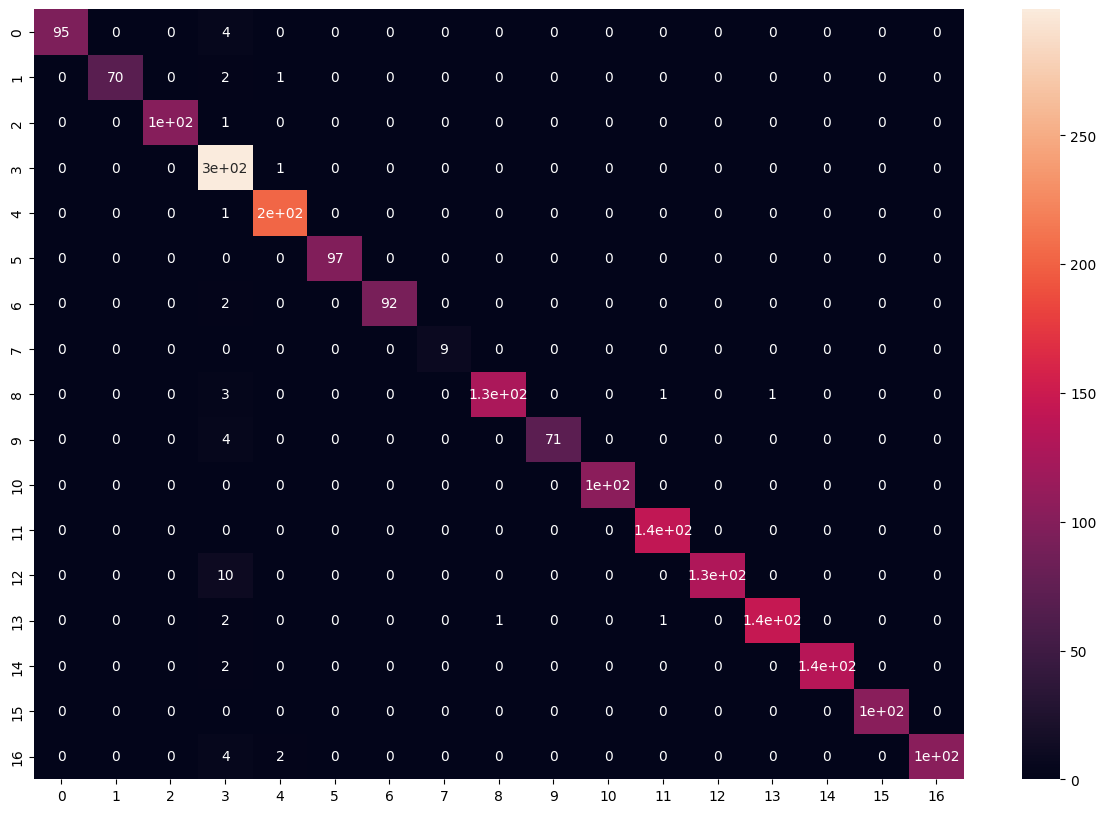

In [ ]:
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
print("Confusion Matrix is:",cm)

Confusion Matrix is: [[ 95   0   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  70   0   2   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 101   1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 299   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1 203   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  97   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0  92   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9   0   0   0   0   0   0   0   0   0]
 [  0   0   0   3   0   0   0   0 127   0   0   1   0   1   0   0   0]
 [  0   0   0   4   0   0   0   0   0  71   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 104   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 142   0   0   0   0   0]
 [  0   0   0  10   0   0   0   0   0   0   0   0 129   0   0   0   0]
 [  0   0   0   2   0   0   0   0   1   0   0   1   0 14

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('vectorizer', cv), ('multinomialNB', model)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('multinomialNB', MultinomialNB())])

In [ ]:
y_pred2 = pipe.predict(X_test)
ac2 = accuracy_score(y_test, y_pred2)
print("Accuracy is :",ac2)

Accuracy is : 0.9792069632495164


In [ ]:
with open('trained_pipeline-0.1.0.pkl','wb') as f:
    pickle.dump(pipe, f)

In [ ]:
# saving both cv and model
pickle.dump(cv, open("transform.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))

In [ ]:
text = "Hello, how are you?"
text = "ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ"
#text = "Hi, how are you?"
y = pipe.predict([text])
le.classes_[y[0]], y

('Kannada', array([9]))